# Feature engineering using dimensionality reduction

#### Description:

This codebook covers how to perform feature engineering using dimensionality reduction.

#### Skill level:

- Advanced

### Import the required libraries
-------------------------

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/pokemon.csv'))

### Check the shape and head of the dataframe
-------------------------

In [4]:
df_raw.shape

(800, 13)

In [5]:
df_raw.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


### Check common statistics for numeric columns
-------------------------

In [6]:
df_raw.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### Make a copy of the dataframe with only numeric columns
-------------------------

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df_raw.select_dtypes(include=numerics)

### Check the explained variance over PCA components for numeric columns
-------------------------

In [8]:
def generate_pca_expvarplot(df):   
    pca_components = 6
   
    df_pca = pd.DataFrame(columns=['dimension', 'variance'])
    
    pca = PCA(n_components=pca_components)
    pca.fit(df)

    for c in range(0, pca_components):
        df_pca.loc[len(df_pca.index)] = [c+1, pca.explained_variance_ratio_[c]]
    
    return df_pca

In [9]:
df_pca = generate_pca_expvarplot(df_numeric)

<AxesSubplot:xlabel='dimension', ylabel='variance'>

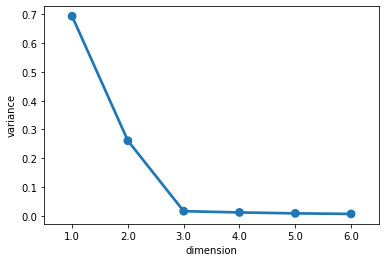

In [10]:
sns.pointplot(x='dimension', y='variance', data=df_pca)

### Fit a PCA model to capture the first three components
-------------------------

In [11]:
pca = PCA(n_components=3)

pca.fit(df_numeric)

PCA(n_components=3)

### Apply the PCA model to the data and check the component values
-------------------------

In [12]:
pca = pca.transform(df_numeric)

df_pca = pd.DataFrame(pca)

In [13]:
df_pca.head()

,0,1,2
0,-374.263475,-81.675261,-2.691607
1,-362.078520,11.267805,-3.105120
2,-345.628885,139.581726,-2.527332
3,-332.459887,247.590671,21.686032
4,-372.677746,-91.949128,-19.071162


### Fit an ICA model to capture the first three components
-------------------------

In [14]:
ica = FastICA(n_components=3)

ica.fit(df_numeric)

FastICA(n_components=3)

### Apply the ICA model to the data and check the component values
-------------------------

In [15]:
ica = ica.transform(df_numeric)

df_ica = pd.DataFrame(ica)

In [16]:
df_ica.head()

,0,1,2
0,-0.029731,0.059989,-0.005987
1,-0.004064,0.060813,-0.007273
2,0.031402,0.062095,-0.007774
3,0.062036,0.064992,0.018219
4,-0.033060,0.058227,-0.024105
